<a href="https://colab.research.google.com/github/kanchan14kumari/sentiment-and-emotion-analysis-of-codemixed-data/blob/main/Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lstm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding ,Bidirectional
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import accuracy_score

In [ ]:
#emotion
# Load datasets from CSV files
train_df_emotion = pd.read_csv("preprocessed_train.csv")
test_df_emotion = pd.read_csv("preprocessed_test.csv")
val_df_emotion = pd.read_csv("preprocessed_val.csv")

# Fill missing values in each dataset
train_df_emotion.fillna("", inplace=True)
val_df_emotion.fillna("", inplace=True)
test_df_emotion.fillna("", inplace=True)

# Define label mapping
label_map = {'anger': 0, 'fear': 1, 'joy': 2, 'disgust': 3, 'sadness': 4, 'surprise': 5, 'others': 6}

# Apply label encoding
train_df_emotion['emotion'] = train_df_emotion['emotion'].map(label_map)
val_df_emotion['emotion'] = val_df_emotion['emotion'].map(label_map)
test_df_emotion['emotion'] = test_df_emotion['emotion'].map(label_map)

# Convert all data to strings
train_texts = train_df_emotion['tweet'].astype(str).tolist()
val_texts = val_df_emotion['tweet'].astype(str).tolist()
test_texts = test_df_emotion['tweet'].astype(str).tolist()

# Tokenize the data
tokenizer = Tokenizer(num_words=2500, split=' ')
tokenizer.fit_on_texts(train_texts)

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to ensure uniform length
max_sequence_length = 50  # Choose an appropriate sequence length
train_data_emotion = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_data_emotion = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_data_emotion = pad_sequences(test_sequences, maxlen=max_sequence_length)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, Dense, GlobalAveragePooling1D, GlobalMaxPooling1D

# Define the model architecture
vocab_size = 2500
embed_size = 128

inputs = Input(shape=(max_sequence_length,))
embd = Embedding(vocab_size, embed_size, trainable=True)(inputs)
x_lstmConv = LSTM(128, activation='tanh', return_sequences=True, dropout=0.15, recurrent_dropout=0.15)(embd)
x_lstmConv = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x_lstmConv)
avg_pool = GlobalAveragePooling1D()(x_lstmConv)
max_pool = GlobalMaxPooling1D()(x_lstmConv)
x_lstmConv = tf.keras.layers.concatenate([avg_pool, max_pool])
x_lstmConv = Dense(7, activation='softmax')(x_lstmConv)  # Output dimension changed to 7 for 7 emotions

# Compile the model
lstm_model = Model(inputs=inputs, outputs=x_lstmConv)
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
fittingLSTM = lstm_model.fit(train_data_emotion, train_df_emotion['emotion'].values,
                             epochs=7, batch_size=128,
                             validation_data=(val_data_emotion, val_df_emotion['emotion'].values),
                             verbose=2)

# Evaluate the model
test_loss, test_acc = lstm_model.evaluate(test_data_emotion, test_df_emotion['emotion'].values)
print("Test accuracy of LSTM model for emotion classification:", test_acc)



Epoch 1/7
110/110 - 49s - loss: 1.3633 - accuracy: 0.4597 - val_loss: 1.1565 - val_accuracy: 0.5357 - 49s/epoch - 444ms/step
Epoch 2/7
110/110 - 44s - loss: 1.0627 - accuracy: 0.5962 - val_loss: 1.1235 - val_accuracy: 0.5760 - 44s/epoch - 396ms/step
Epoch 3/7
110/110 - 44s - loss: 0.9801 - accuracy: 0.6315 - val_loss: 1.1462 - val_accuracy: 0.5760 - 44s/epoch - 402ms/step
Epoch 4/7
110/110 - 44s - loss: 0.9349 - accuracy: 0.6501 - val_loss: 1.1668 - val_accuracy: 0.5773 - 44s/epoch - 401ms/step
Epoch 5/7
110/110 - 44s - loss: 0.8888 - accuracy: 0.6652 - val_loss: 1.2143 - val_accuracy: 0.5590 - 44s/epoch - 401ms/step
Epoch 6/7
110/110 - 45s - loss: 0.8387 - accuracy: 0.6833 - val_loss: 1.2550 - val_accuracy: 0.5640 - 45s/epoch - 407ms/step
Epoch 7/7
110/110 - 43s - loss: 0.7872 - accuracy: 0.7051 - val_loss: 1.3580 - val_accuracy: 0.5457 - 43s/epoch - 394ms/step
94/94 [==============================] - 3s 36ms/step - loss: 1.1605 - accuracy: 0.5777
Test accuracy of LSTM model for emoti

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get model predictions
predictions = lstm_model.predict(test_data_emotion)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_df_emotion['emotion'].values, predicted_labels)
precision = precision_score(test_df_emotion['emotion'].values, predicted_labels, average='weighted')
recall = recall_score(test_df_emotion['emotion'].values, predicted_labels, average='weighted')
f1 = f1_score(test_df_emotion['emotion'].values, predicted_labels, average='weighted')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


94/94 [==============================] - 8s 67ms/step
Accuracy: 0.5776666666666667
Precision: 0.5960429611498419
Recall: 0.5776666666666667
F1 Score: 0.5696091862624789


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


94/94 [==============================] - 6s 66ms/step


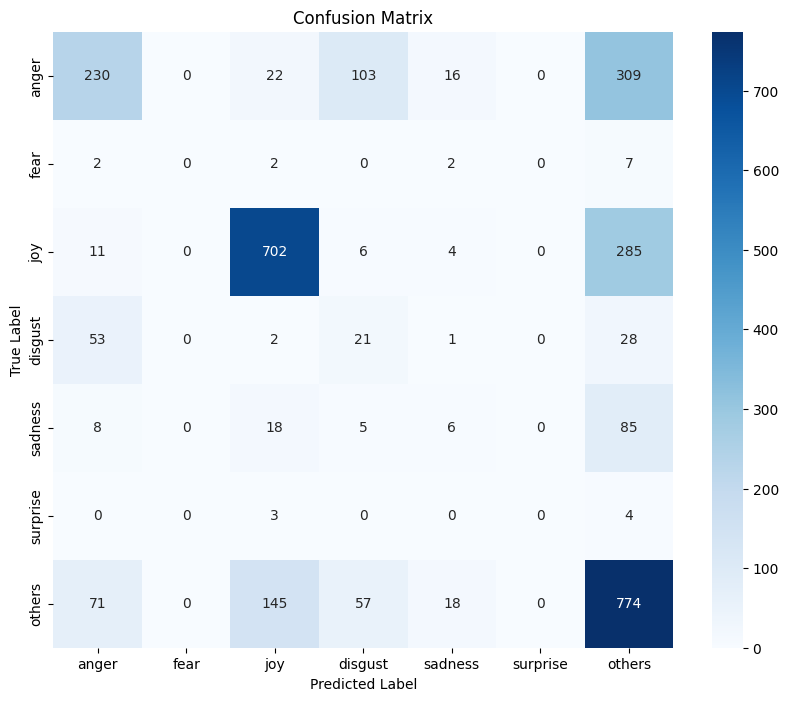

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get model predictions
predictions = lstm_model.predict(test_data_emotion)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_df_emotion['emotion'].values, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


94/94 [==============================] - 7s 77ms/step


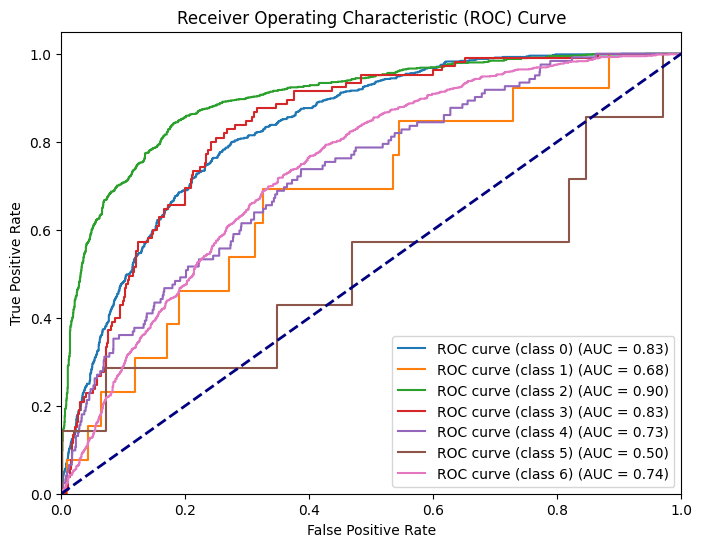

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
predicted_probabilities = lstm_model.predict(test_data_emotion)

# Initialize lists to store fpr, tpr, and auc for each class
all_fpr = []
all_tpr = []
all_auc = []

# Compute ROC curve and ROC area for each class
num_classes = predicted_probabilities.shape[1]
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(test_df_emotion['emotion'].values == i, predicted_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_auc.append(roc_auc)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(all_fpr[i], all_tpr[i], label=f'ROC curve (class {i}) (AUC = {all_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Load sentiment datasets from CSV files
train_df_sentiment = pd.read_csv("/content/preprocessed_train.csv")
test_df_sentiment = pd.read_csv("/content/preprocessed_test.csv")
val_df_sentiment = pd.read_csv("/content/preprocessed_val.csv")

# Fill missing values in each dataset
train_df_sentiment.fillna("", inplace=True)
val_df_sentiment.fillna("", inplace=True)
test_df_sentiment.fillna("", inplace=True)

# Define label mapping
sentiment_label_map = {'neutral': 0, 'positive': 1, 'negative': 2}

# Apply label encoding
train_df_sentiment['sentiment'] = train_df_sentiment['sentiment'].map(sentiment_label_map)
val_df_sentiment['sentiment'] = val_df_sentiment['sentiment'].map(sentiment_label_map)
test_df_sentiment['sentiment'] = test_df_sentiment['sentiment'].map(sentiment_label_map)

# Convert all data to strings
train_texts_sentiment = train_df_sentiment['tweet'].astype(str).tolist()
val_texts_sentiment = val_df_sentiment['tweet'].astype(str).tolist()
test_texts_sentiment = test_df_sentiment['tweet'].astype(str).tolist()

# Tokenize the data
tokenizer_sentiment = Tokenizer(num_words=2500, split=' ')
tokenizer_sentiment.fit_on_texts(train_texts_sentiment)

# Convert text data to sequences
train_sequences_sentiment = tokenizer_sentiment.texts_to_sequences(train_texts_sentiment)
val_sequences_sentiment = tokenizer_sentiment.texts_to_sequences(val_texts_sentiment)
test_sequences_sentiment = tokenizer_sentiment.texts_to_sequences(test_texts_sentiment)

# Pad sequences to ensure uniform length
max_sequence_length_sentiment = 50  # Choose an appropriate sequence length
train_data_sentiment = pad_sequences(train_sequences_sentiment, maxlen=max_sequence_length_sentiment)
val_data_sentiment = pad_sequences(val_sequences_sentiment, maxlen=max_sequence_length_sentiment)
test_data_sentiment = pad_sequences(test_sequences_sentiment, maxlen=max_sequence_length_sentiment)

# Define the model architecture for sentiment classification
inputs_sentiment = Input(shape=(max_sequence_length_sentiment,))
embd_sentiment = Embedding(vocab_size, embed_size, trainable=True)(inputs_sentiment)
x_lstmConv_sentiment = LSTM(128, activation='tanh', return_sequences=True, dropout=0.15, recurrent_dropout=0.15)(embd_sentiment)
x_lstmConv_sentiment = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x_lstmConv_sentiment)
avg_pool_sentiment = GlobalAveragePooling1D()(x_lstmConv_sentiment)
max_pool_sentiment = GlobalMaxPooling1D()(x_lstmConv_sentiment)
x_lstmConv_sentiment = tf.keras.layers.concatenate([avg_pool_sentiment, max_pool_sentiment])
x_lstmConv_sentiment = Dense(3, activation='softmax')(x_lstmConv_sentiment)  # Output dimension changed to 3 for 3 sentiments

# Compile the sentiment model
lstm_model_sentiment = Model(inputs=inputs_sentiment, outputs=x_lstmConv_sentiment)
lstm_model_sentiment.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the sentiment model
fittingLSTM_sentiment = lstm_model_sentiment.fit(train_data_sentiment, train_df_sentiment['sentiment'].values,
                                                 epochs=7, batch_size=128,
                                                 validation_data=(val_data_sentiment, val_df_sentiment['sentiment'].values),
                                                 verbose=2)

# Evaluate the sentiment model
test_loss_sentiment, test_acc_sentiment = lstm_model_sentiment.evaluate(test_data_sentiment, test_df_sentiment['sentiment'].values)
print("Test accuracy of LSTM model for sentiment classification:", test_acc_sentiment)


Epoch 1/7
110/110 - 51s - loss: 0.9589 - accuracy: 0.5095 - val_loss: 0.8661 - val_accuracy: 0.5940 - 51s/epoch - 462ms/step
Epoch 2/7
110/110 - 47s - loss: 0.7972 - accuracy: 0.6384 - val_loss: 0.8687 - val_accuracy: 0.5950 - 47s/epoch - 426ms/step
Epoch 3/7
110/110 - 46s - loss: 0.7417 - accuracy: 0.6698 - val_loss: 0.8764 - val_accuracy: 0.5920 - 46s/epoch - 418ms/step
Epoch 4/7
110/110 - 46s - loss: 0.7000 - accuracy: 0.6931 - val_loss: 0.9060 - val_accuracy: 0.5833 - 46s/epoch - 418ms/step
Epoch 5/7
110/110 - 47s - loss: 0.6597 - accuracy: 0.7156 - val_loss: 0.9534 - val_accuracy: 0.5823 - 47s/epoch - 426ms/step
Epoch 6/7
110/110 - 46s - loss: 0.6165 - accuracy: 0.7348 - val_loss: 1.0073 - val_accuracy: 0.5800 - 46s/epoch - 415ms/step
Epoch 7/7
110/110 - 47s - loss: 0.5664 - accuracy: 0.7594 - val_loss: 1.1306 - val_accuracy: 0.5700 - 47s/epoch - 424ms/step
94/94 [==============================] - 2s 23ms/step - loss: 0.9739 - accuracy: 0.6183
Test accuracy of LSTM model for senti

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get model predictions for sentiment
predictions_sentiment = lstm_model_sentiment.predict(test_data_sentiment)
predicted_labels_sentiment = np.argmax(predictions_sentiment, axis=1)

# Calculate metrics for sentiment
accuracy_sentiment = accuracy_score(test_df_sentiment['sentiment'].values, predicted_labels_sentiment)
precision_sentiment = precision_score(test_df_sentiment['sentiment'].values, predicted_labels_sentiment, average='weighted')
recall_sentiment = recall_score(test_df_sentiment['sentiment'].values, predicted_labels_sentiment, average='weighted')
f1_sentiment = f1_score(test_df_sentiment['sentiment'].values, predicted_labels_sentiment, average='weighted')

# Print metrics for sentiment
print("Accuracy for sentiment:", accuracy_sentiment)
print("Precision for sentiment:", precision_sentiment)
print("Recall for sentiment:", recall_sentiment)
print("F1 Score for sentiment:", f1_sentiment)


94/94 [==============================] - 7s 65ms/step
Accuracy for sentiment: 0.6183333333333333
Precision for sentiment: 0.6198023280514333
Recall for sentiment: 0.6183333333333333
F1 Score for sentiment: 0.6188168594408215


94/94 [==============================] - 4s 46ms/step


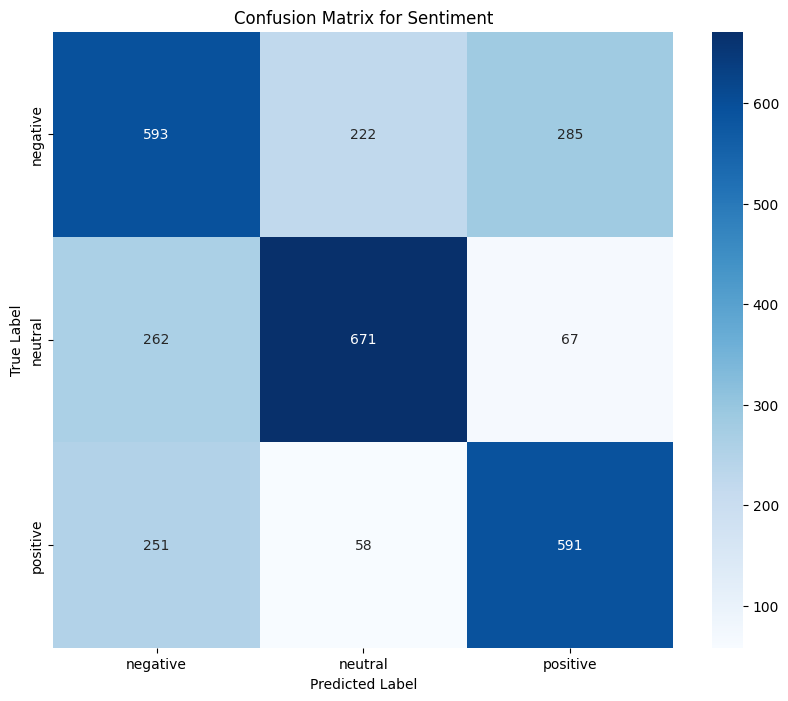

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get model predictions for sentiment
predictions_sentiment = lstm_model_sentiment.predict(test_data_sentiment)
predicted_labels_sentiment = np.argmax(predictions_sentiment, axis=1)

# Define the label mapping for sentiment
label_map_sentiment = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Calculate confusion matrix for sentiment
conf_matrix_sentiment = confusion_matrix(test_df_sentiment['sentiment'].values, predicted_labels_sentiment)

# Plot confusion matrix for sentiment
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_sentiment, annot=True, fmt='d', cmap='Blues', xticklabels=label_map_sentiment.values(), yticklabels=label_map_sentiment.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Sentiment')
plt.show()


94/94 [==============================] - 5s 48ms/step


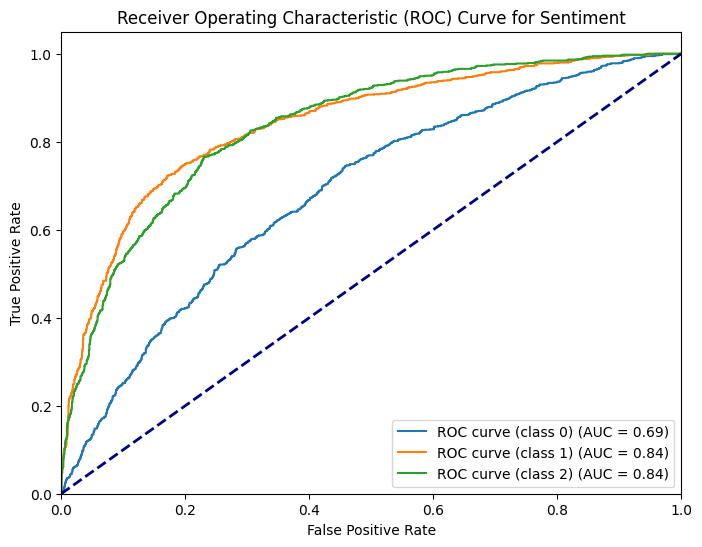

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class for sentiment
predicted_probabilities_sentiment = lstm_model_sentiment.predict(test_data_sentiment)

# Initialize lists to store fpr, tpr, and auc for each class
all_fpr_sentiment = []
all_tpr_sentiment = []
all_auc_sentiment = []

# Compute ROC curve and ROC area for each class for sentiment
num_classes_sentiment = predicted_probabilities_sentiment.shape[1]
for i in range(num_classes_sentiment):
    fpr_sentiment, tpr_sentiment, _ = roc_curve(test_df_sentiment['sentiment'].values == i, predicted_probabilities_sentiment[:, i])
    roc_auc_sentiment = auc(fpr_sentiment, tpr_sentiment)
    all_fpr_sentiment.append(fpr_sentiment)
    all_tpr_sentiment.append(tpr_sentiment)
    all_auc_sentiment.append(roc_auc_sentiment)

# Plot ROC curve for each class for sentiment
plt.figure(figsize=(8, 6))
for i in range(num_classes_sentiment):
    plt.plot(all_fpr_sentiment[i], all_tpr_sentiment[i], label=f'ROC curve (class {i}) (AUC = {all_auc_sentiment[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Sentiment')
plt.legend(loc='lower right')
plt.show()


#combine for sentiment and emotion

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, Dense, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate

# Load dataset from CSV file
train_df = pd.read_csv("/content/preprocessed_train.csv")  # Update path to your training dataset
test_df = pd.read_csv("/content/preprocessed_test.csv")    # Update path to your testing dataset
val_df = pd.read_csv("/content/preprocessed_val.csv")      # Update path to your validation dataset

# Combine sentiment and emotion labels into a single label
train_df['combined_label'] = train_df['sentiment'] + "_" + train_df['emotion']
test_df['combined_label'] = test_df['sentiment'] + "_" + test_df['emotion']
val_df['combined_label'] = val_df['sentiment'] + "_" + val_df['emotion']

# Convert all data to strings
train_df['tweet'] = train_df['tweet'].astype(str)
test_df['tweet'] = test_df['tweet'].astype(str)
val_df['tweet'] = val_df['tweet'].astype(str)

# Encode the combined label
label_encoder = LabelEncoder()
train_df['combined_label_encoded'] = label_encoder.fit_transform(train_df['combined_label'])
test_df['combined_label_encoded'] = label_encoder.transform(test_df['combined_label'])
val_df['combined_label_encoded'] = label_encoder.transform(val_df['combined_label'])

# Tokenize the data
tokenizer = Tokenizer(num_words=2500, split=' ')
tokenizer.fit_on_texts(train_df['tweet'])

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['tweet'])
val_sequences = tokenizer.texts_to_sequences(val_df['tweet'])
test_sequences = tokenizer.texts_to_sequences(test_df['tweet'])

# Pad sequences to ensure uniform length
max_sequence_length = 50  # Choose an appropriate sequence length
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_data = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Define model architecture with LSTM
vocab_size = 2500
embed_size = 128

inputs = Input(shape=(max_sequence_length,))
embd = Embedding(vocab_size, embed_size, trainable=True)(inputs)
x_lstm = LSTM(128, activation='tanh', return_sequences=True, dropout=0.15, recurrent_dropout=0.15)(embd)
x_lstm = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x_lstm)
avg_pool = GlobalAveragePooling1D()(x_lstm)
max_pool = GlobalMaxPooling1D()(x_lstm)
x_lstm = concatenate([avg_pool, max_pool])
x_lstm = Dense(label_encoder.classes_.shape[0], activation='softmax')(x_lstm)

# Compile the model
lstm_model = Model(inputs=inputs, outputs=x_lstm)
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(train_data, train_df['combined_label_encoded'].values,
                         epochs=7, batch_size=128,
                         validation_data=(val_data, val_df['combined_label_encoded'].values),
                         verbose=2)

# Evaluate the model
test_loss, test_acc = lstm_model.evaluate(test_data, test_df['combined_label_encoded'].values)
print("\nTest accuracy of LSTM model:", test_acc)


Epoch 1/7
110/110 - 59s - loss: 2.0746 - accuracy: 0.3086 - val_loss: 1.9843 - val_accuracy: 0.2820 - 59s/epoch - 535ms/step
Epoch 2/7
110/110 - 45s - loss: 1.7813 - accuracy: 0.4241 - val_loss: 1.6987 - val_accuracy: 0.4890 - 45s/epoch - 411ms/step
Epoch 3/7
110/110 - 45s - loss: 1.5932 - accuracy: 0.5114 - val_loss: 1.7010 - val_accuracy: 0.4947 - 45s/epoch - 407ms/step
Epoch 4/7
110/110 - 43s - loss: 1.5315 - accuracy: 0.5288 - val_loss: 1.6932 - val_accuracy: 0.5033 - 43s/epoch - 392ms/step
Epoch 5/7
110/110 - 45s - loss: 1.4825 - accuracy: 0.5415 - val_loss: 1.7389 - val_accuracy: 0.4977 - 45s/epoch - 411ms/step
Epoch 6/7
110/110 - 43s - loss: 1.4351 - accuracy: 0.5607 - val_loss: 1.7440 - val_accuracy: 0.4923 - 43s/epoch - 393ms/step
Epoch 7/7
110/110 - 45s - loss: 1.3865 - accuracy: 0.5749 - val_loss: 1.7925 - val_accuracy: 0.4713 - 45s/epoch - 406ms/step
94/94 [==============================] - 2s 23ms/step - loss: 1.5997 - accuracy: 0.5207

Test accuracy of LSTM model: 0.52066

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions
y_pred = lstm_model.predict(test_data)
y_pred_labels = label_encoder.inverse_transform(y_pred.argmax(axis=1))  # Decode predicted labels

# Decode true labels
y_true_labels = label_encoder.inverse_transform(test_df['combined_label_encoded'])

# Calculate evaluation metrics
accuracy_combined = test_acc
precision_combined = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall_combined = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1_score_combined = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
print("LSTM evaluation for combined sentiment and emotion:")
print("Accuracy:", accuracy_combined)
print("Precision:", precision_combined)
print("Recall:", recall_combined)
print("F1 Score:", f1_score_combined)


94/94 [==============================] - 6s 60ms/step
LSTM evaluation for combined sentiment and emotion:
Accuracy: 0.5206666588783264
Precision: 0.5279680055215196
Recall: 0.5206666666666667
F1 Score: 0.475629049507035


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
# Check the number of unique class labels
num_unique_labels = len(np.unique(y_true_labels))
print("Number of unique class labels:", num_unique_labels)

# Check the shape of the confusion matrix
print("Shape of confusion matrix:", conf_matrix.shape)

Number of unique class labels: 18
Shape of confusion matrix: (18, 18)


In [ ]:
# Check the number of unique class labels
num_unique_labels = len(np.unique(y_true_labels))
print("Number of unique class labels:", num_unique_labels)

# Check the shape of the confusion matrix
print("Shape of confusion matrix:", conf_matrix.shape)

Number of unique class labels: 18
Shape of confusion matrix: (18, 18)


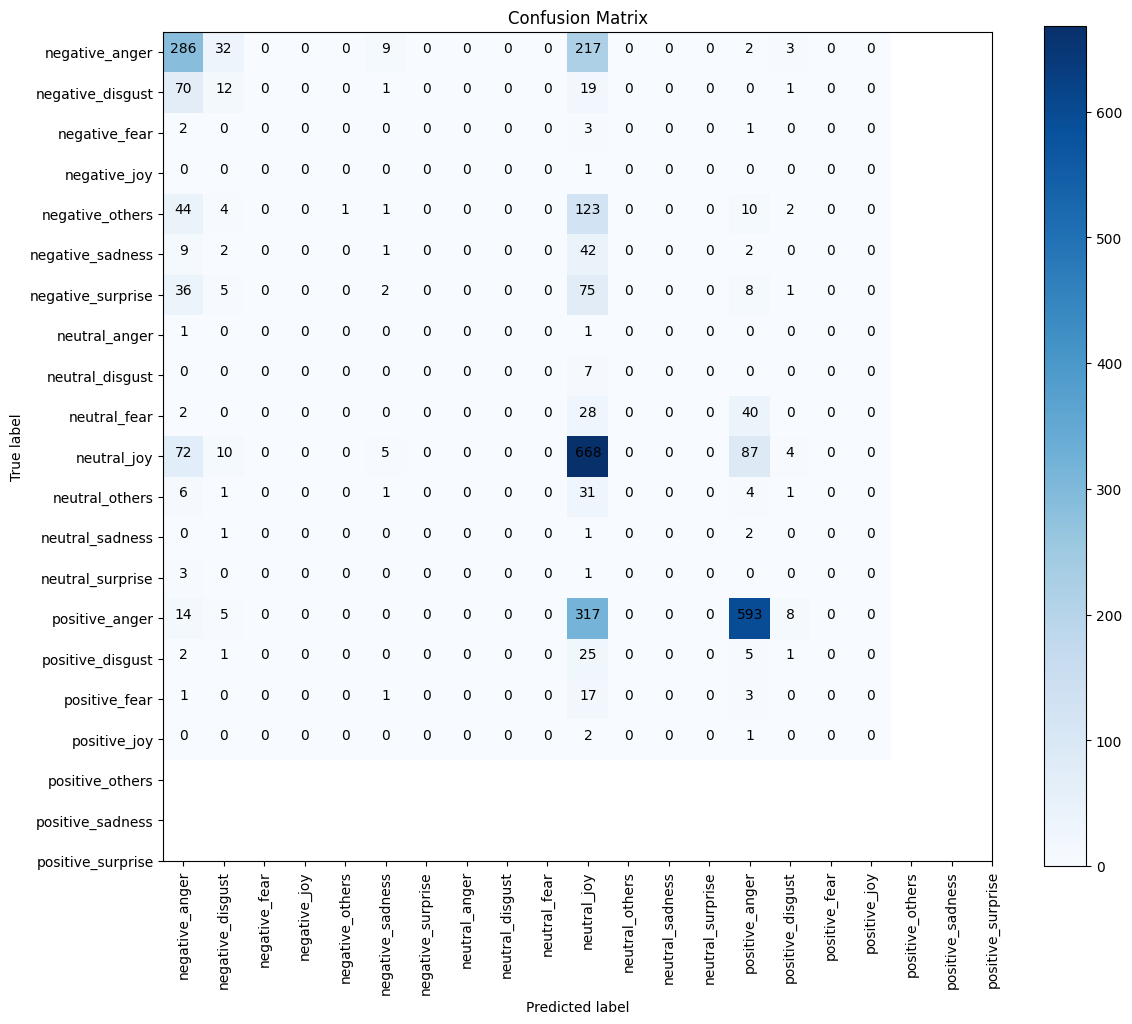

In [ ]:
# Plot confusion matrix with class names
plt.figure(figsize=(12, 10))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add class names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Add numerical values in each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


94/94 [==============================] - 7s 73ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


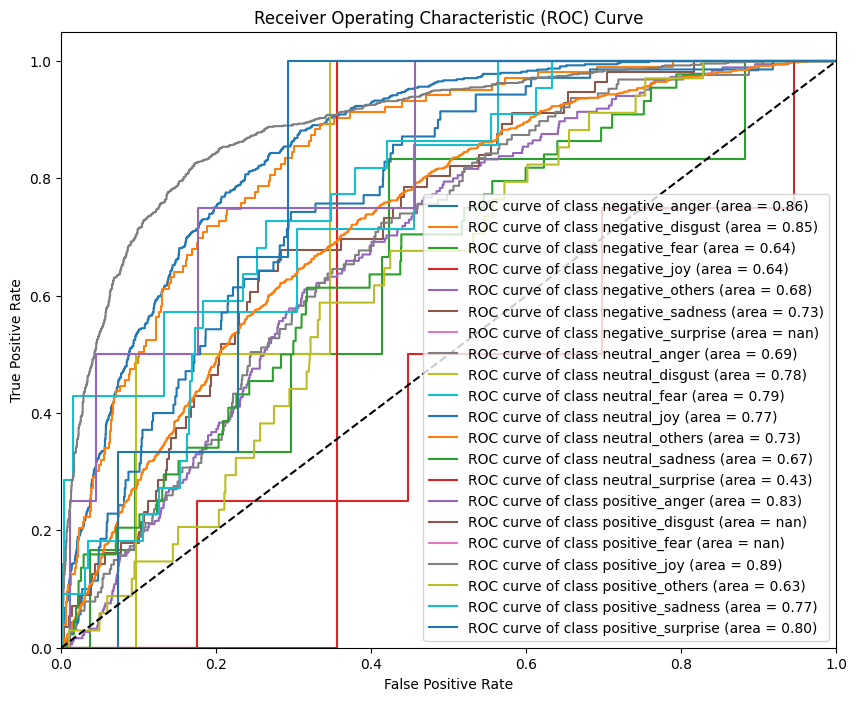

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_score = lstm_model.predict(test_data)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(test_df['combined_label_encoded'] == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {} (area = {:.2f})'.format(label_encoder.inverse_transform([i])[0], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
